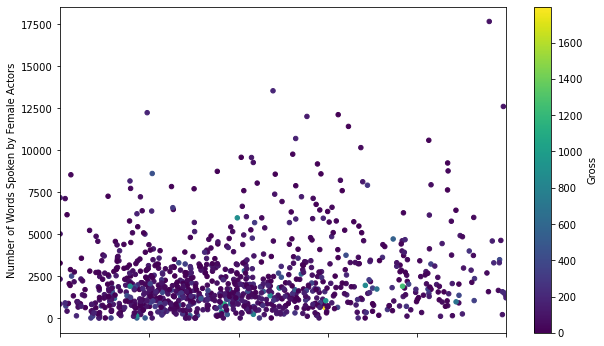

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm

from IPython.core.pylabtools import figsize

figsize(10, 6)  

df = pd.read_csv("train.csv", na_values="?", dtype={"ID": str}).dropna().reset_index()

# df.head()


Text(0.5, 1.0, 'Female and male leads by year')

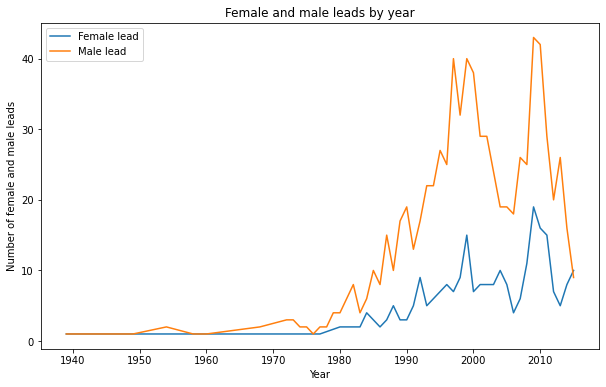

In [87]:
df_female = df[df['Lead'] == 'Female']
df_female_count = df_female.groupby('Year')['Lead'].count()
df_male = df[df['Lead'] == "Male"]
df_male_count = df_male.groupby('Year')['Lead'].count()
# print(df_male_count)
plt.plot(df_female_count.index, df_female_count.values, label = "Female lead")
plt.plot(df_male_count.index, df_male_count.values, label = "Male lead")
plt.xlabel('Year')
plt.ylabel('Number of female and male leads')
plt.legend()
plt.title('Female and male leads by year')

Text(0.5, 1.0, 'Proportion of female Leads (% of total leads) by year')

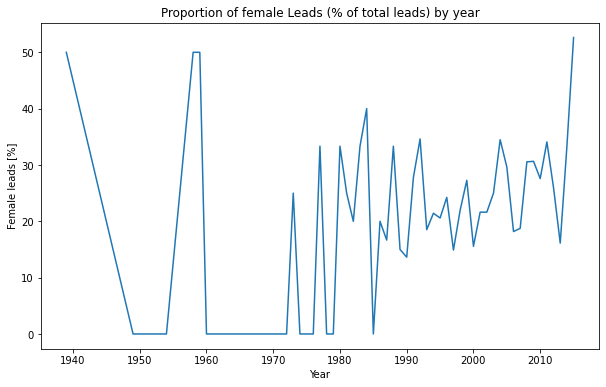

In [88]:
df_female = df[df['Lead'] == 'Female']
df_female_count = df_female.groupby('Year')['Lead'].count()

df_male = df[df['Lead'] == 'Male']
df_male_count = df_male.groupby('Year')['Lead'].count()
df_counts = pd.concat([df_female_count, df_male_count], axis=1).fillna(0)
df_counts.columns = ['Female Leads', 'Male Leads']

df_counts = df_counts.sort_index()

# print(df_counts)

df_counts['Percent female'] = df_counts['Female Leads'] / (df_counts['Male Leads'] + df_counts['Female Leads']) * 100

plt.plot(df_counts.index, df_counts['Percent female'], label='Percent Female Leads')
plt.xlabel('Year')
plt.ylabel('Female leads [%]')
plt.title('Proportion of female Leads (% of total leads) by year')

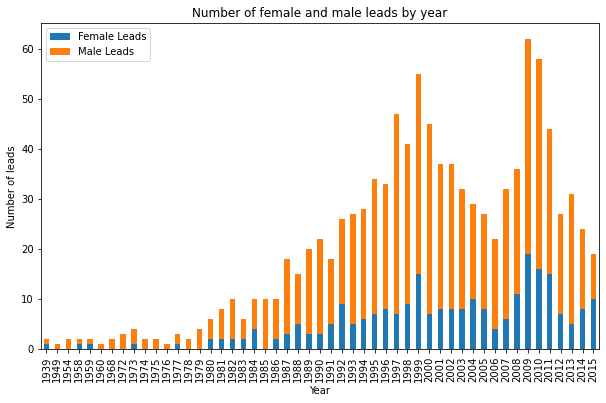

In [89]:
df_female = df[df['Lead'] == 'Female']
df_female_count = df_female.groupby('Year')['Lead'].count()

df_male = df[df['Lead'] == 'Male']
df_male_count = df_male.groupby('Year')['Lead'].count()
df_counts = pd.concat([df_female_count, df_male_count], axis=1).fillna(0)
df_counts.columns = ['Female Leads', 'Male Leads']
df_counts = df_counts.sort_index()

df_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of leads')
plt.title('Number of female and male leads by year')
plt.show()


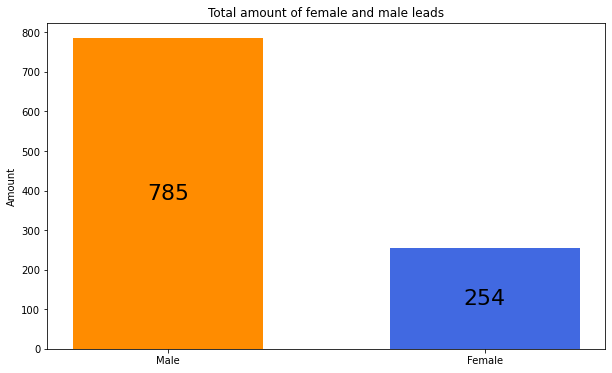

In [148]:
df_female = df[df['Lead'] == 'Female']
female_leads = df_female.shape[0]
df_male = df[df['Lead'] == 'Male']
male_leads = df_male.shape[0]

fig, ax = plt.subplots()
actors = ['Male', 'Female']
bar_colours = ['darkorange', 'royalblue']
bar_width = 0.6

bars = ax.bar(actors, [male_leads, female_leads], color=bar_colours, width=bar_width)
ax.set_ylabel('Amount')
ax.set_title('Total amount of female and male leads')

# Add total count inside each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, height, fontsize=22, ha='center', va='center', color='black')

plt.show()


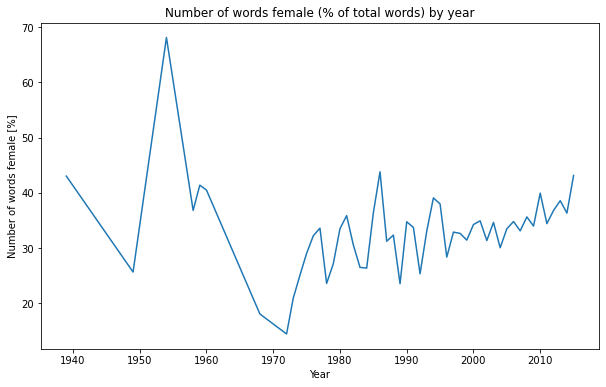

In [90]:
gender_percents = df.groupby('Year')[['Number words female', 'Number words male']].sum()
# print(gender_percents)
gender_percents['Percent female'] = gender_percents['Number words female'] / (gender_percents['Number words female'] + gender_percents['Number words male']) * 100
gender_percents['Percent female'].plot()

plt.xlabel('Year')
plt.ylabel('Number of words female [%]')
plt.title('Number of words female (% of total words) by year')
plt.show()


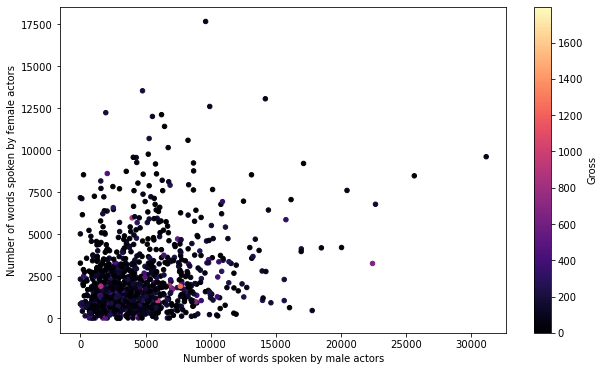

In [106]:
cmap = plt.cm.get_cmap('viridis_r')

# Pass the reversed colormap to the colormap parameter
df.plot.scatter(x='Number words male', y='Number words female', c='Gross', cmap='magma', sharex=False)
plt.xlabel('Number of words spoken by male actors')
plt.ylabel('Number of words spoken by female actors')

plt.show()


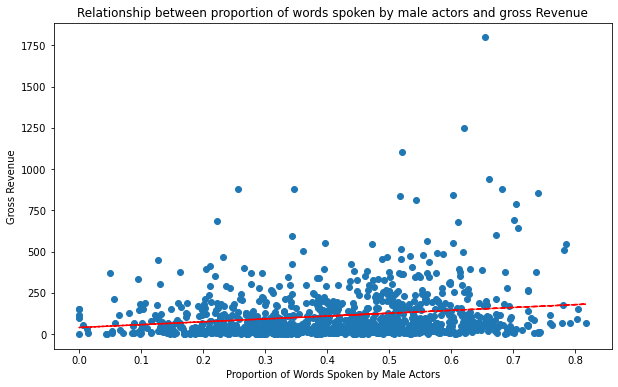

In [99]:
import pandas as pd

# load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# calculate the proportion of words spoken by male actors
df['prop_words_male'] = df['Number words male'] / df['Total words']

plt.scatter(df['prop_words_male'], df['Gross'])

# fit and plot a linear regression line
z = np.polyfit(df['prop_words_male'], df['Gross'], 1)
p = np.poly1d(z)
plt.plot(df['prop_words_male'], p(df['prop_words_male']), "r--")

# add axis labels and title
plt.xlabel('Proportion of words spoken by male actors')
plt.ylabel('Gross revenue')
plt.title('Relationship between proportion of words spoken by male actors and gross Revenue')

plt.show()

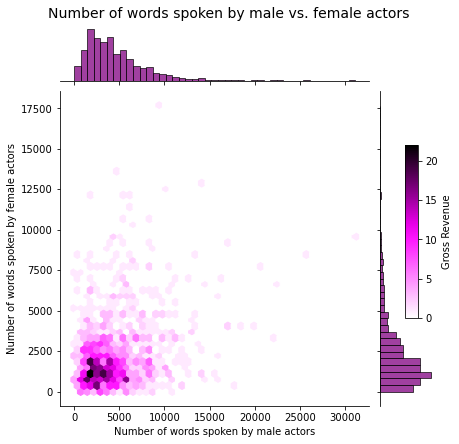

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("train.csv")

# Create jointplot
g = sns.jointplot(data=df, x='Number words male', y='Number words female', kind='hex', color='purple')
g.fig.suptitle("Number of words spoken by male vs. female actors", y=1.02, fontsize=14)
g.set_axis_labels("Number of words spoken by male actors", "Number of words spoken by female actors")

# Add color bar
cbar_ax = g.fig.add_axes([.91, .3, .03, .4])
g.fig.colorbar(mappable=g.ax_joint.collections[0], cax=cbar_ax, label='Gross Revenue')

# Set axis labels and title
# plt.xlabel('Number of Words Spoken by Female Actors')
plt.ylabel('Gross Revenue')
# plt.title('Total Gross by Number of Words Spoken')

# Display plot
plt.show()
